# SIR Model
We will model the spread of a virus by representing population groups as nodes in a graph

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def deriv(y, t, N, beta, gamma):
    """ 
    Diffrential equations for the SIR model
    """
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [2]:
def plot_SIR(t, S, I, R):
    """ 
    Linear plot of the SIR model
    """
    fig = plt.figure(figsize = (10, 8))
    ax = fig.add_subplot(111, facecolor = '#dddddd', axisbelow = True)
    ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number (1000s)')
    ax.set_title('SIR Model')
    ax.legend()
    plot = plt.show()

    return plot


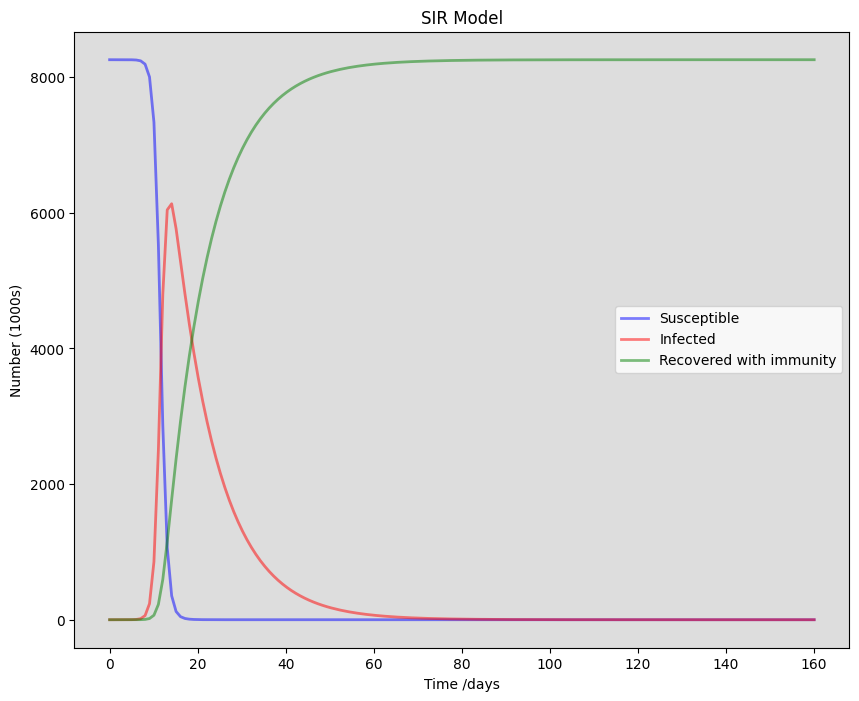

In [3]:
# initialize numbers for testing
N = 8258000 # NYC population
beta = 1.47 # infection rate is 1.46 to 1.48 people per person
gamma = 0.1 # recovery rate

# initial conditions
I0 = 1 # infected
R0 = 0 # recovered
S0 = N - I0 - R0
t = np.linspace(0, 160, 160) # time vector

# integrate the SIR equations over the time vector
ret = odeint(deriv, (S0, I0, R0), t, args = (N, beta, gamma))

# plot the results
plot_SIR(t, ret[:,0], ret[:,1], ret[:,2])